<a href="https://colab.research.google.com/github/ryuuwon/CongNghePhanMemFinal/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

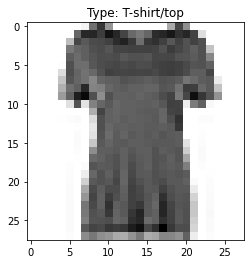

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SGDClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


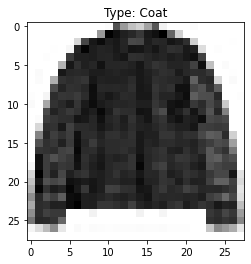

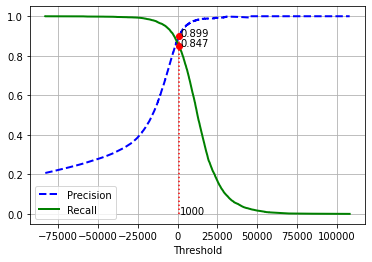

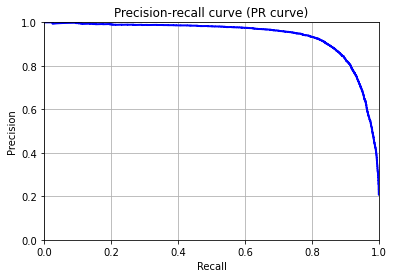

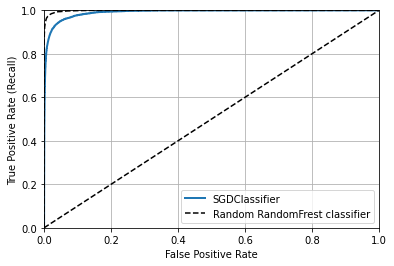

Finish 



/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


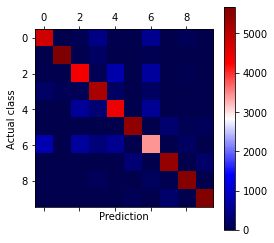

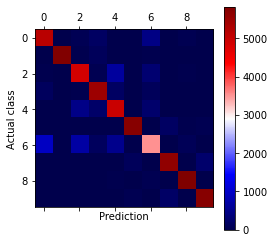

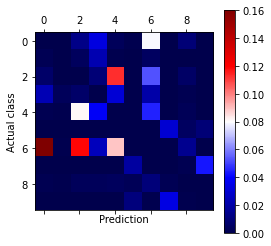

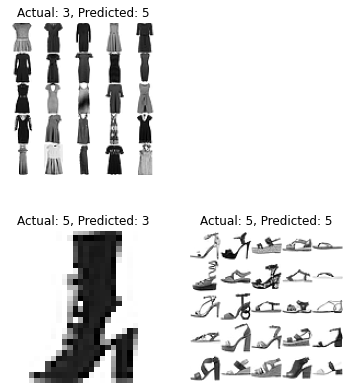


 8.5


In [ ]:

# In[0]: IMPORTS
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
# Note: require sklearn v0.22+ (to update sklearn: pip install -U scikit-learn )
import joblib #for old version sklearn: from sklearn.externals import joblib 


# In[1]: FASHION-MNIST DATASET
''' DESCIPTION
This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. 
This dataset can be used as a drop-in replacement for MNIST.
https://tensorflow.org/images/fashion-mnist-sprite.png
The classes are:
Label	Description
0	T-shirt/top
1	Trouser 
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
'''

# Tạo Dictionary để lưu mô tả cho các giá trị
dict_Type ={0:'T-shirt/top',
            1:'Trouser',
            2:'Pullover',
            3:'Dress',
            4:'Coat',
            5:'Sandal',
            6:'Shirt',
            7:'Sneaker',
            8:'Bag',
            9:'Ankle boot'}

# 1.1. Load Dataset      
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Số features = 28 * 28 = 784
# 1.2. Reshape to 2D array: each row has 784 features
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

# 1.3. Plot a digit image   
def plot_digit(data, label = 'unspecified'):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.title("Type: " + str(dict_Type[label]))
    #plt.axis("off")
    plt.show()
sample_id = 10
plot_digit(X_train[sample_id], y_train[sample_id])


# In[2]: TRAINING A BINARY CLASSIFIER (just two classes, Sandal and not Sandal)               
# 2.1. Create label array: True for Sandal, False for other Type.
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)

# 2.2. Try Stochastic Gradient Descent (SGD) classifier
# Note 1: In sklearn, SGDClassifier train linear classifiers using SGD, 
#         depending on the loss, eg. ‘hinge’ (default): linear SVM, ‘log’: logistic regression, etc.
# Note 2: SGD takes 1 datum at a time, hence well suited for online learning. 
#         It also able to handle very large datasets efficiently
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier       
sgd_clf = SGDClassifier(random_state=42) # set random_state to reproduce the result

# Train: 
# Warning: takes time!
new_run = False
if new_run==True:
    sgd_clf.fit(X_train, y_train_5)
    joblib.dump(sgd_clf,'saved_var/sgd_clf_binary')
else:
    sgd_clf = joblib.load('saved_var/sgd_clf_binary')
# Predict a sample:
sample_id = 312
plot_digit(X_train[sample_id], label=y_train[sample_id])
sgd_clf.predict([X_train[sample_id]])
y_train_5[sample_id]

# In[3]: PERFORMANCE MEASURES 
# 3.1. Accuracy (with cross-validation) of SGDClassifier 
from sklearn.model_selection import cross_val_score
# Warning: takes time!
if new_run==True:
    accuracies = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
    joblib.dump(accuracies,'saved_var/sgd_clf_binary_acc')
else:
    accuracies = joblib.load('saved_var/sgd_clf_binary_acc')

# 3.2. Accuracy of a dump classifier
# Note: We are having an IMBALANCED data, hence accuracy is not useful!
from sklearn.base import BaseEstimator
class DumpClassifier(BaseEstimator): # always return False (not Sandal label)
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
no_5_model = DumpClassifier()
cross_val_score(no_5_model, X_train, y_train_5, cv=3, scoring="accuracy")
# Note: 
#   độ chính xác khoảng 90%, do chỉ có khoảng 10% hình ảnh là Sandal.
#   IMBALANCED (or skewed) datasets: some classes are much more frequent than others.

# 3.3. Confusion matrix (better for imbalanced data)
# Info: number of times the classifier "confused" b/w samples of classes
from sklearn.model_selection import cross_val_predict 
# Warning: takes time!
if new_run==True:
    y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) 
    # performs k-fold CV and returns predictions
    # k = 3
    joblib.dump(y_train_pred,'saved_var/y_train_pred')
else:
    y_train_pred = joblib.load('saved_var/y_train_pred')
from sklearn.metrics import confusion_matrix  
conf_mat = confusion_matrix(y_train_5, y_train_pred) # row: actual class, column: predicted class. 
# Perfect prediction: zeros off the main diagonal 
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

# 3.4. Precision and recall (>> see slide)
# Info: 
#   row: actual class, column: predicted class. 
#   negatives: class 0, positives: class 1

#   true positives, true negatives: CORRECT classifications
#   false positives, false negatives: INCORRECT classifications

#   precision = TP/(TP + FP)
#   recall = TP/(TP + FN)
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

# 3.5. F1-score 
# Info: F1-score is the harmonic mean of precision and recall. 1: best, 0: worst.
#   F1 = 2 × precision × recall / (precision + recall)
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)
#precision và recall sấp xỉ =0.8
#F1 tính ra theo hình sấp xỉ 0.8 => SGD Classifier khá hiệu quả trong việc phân loại ảnh quần áo với bộ dataset này

# 3.6. Precision/Recall tradeoff (>> see slide) 
# 3.6.1. Try classifying using some threshold (on score computed by the model)  
sample_id = 11
y_score = sgd_clf.decision_function([X_train[sample_id]]) # score by the model
threshold = 0
y_some_digit_pred = (y_score > threshold)
y_train_5[sample_id]
# Raising the threshold decreases recall
threshold = 20000
y_some_digit_pred = (y_score > threshold)  


# 3.6.2. Precision, recall curves wrt to thresholds 
# Get scores of all intances
# Warning: takes time!
if new_run==True:
    y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
    joblib.dump(y_scores,'saved_var/y_scores')
else:
    y_scores = joblib.load('saved_var/y_scores')
# Plot precision,  recall curves
from sklearn.metrics import precision_recall_curve
let_plot = True
if let_plot:
    precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend() 
    plt.grid(True)
    plt.xlabel("Threshold")   
# Plot a threshold
thres_value = 1000
thres_id = np.min(np.where(thresholds >= thres_value))
precision_at_thres_id = precisions[thres_id] 
recall_at_thres_id = recalls[thres_id]
if let_plot:
    plt.plot([thres_value, thres_value], [0, precision_at_thres_id], "r:")    
    plt.plot([thres_value], [precision_at_thres_id], "ro")                            
    plt.plot([thres_value], [recall_at_thres_id], "ro")            
    plt.text(thres_value+500, 0, thres_value)    
    plt.text(thres_value+500, precision_at_thres_id, np.round(precision_at_thres_id,3))                            
    plt.text(thres_value+500, recall_at_thres_id, np.round(recall_at_thres_id,3))     
    plt.show()


# 3.6.3. Precision vs recall curve (Precision-recall curve)
if let_plot:
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
    plt.title("Precision-recall curve (PR curve)")
    plt.show()


# 3.7. Receiver operating characteristic (ROC) curve 
# Info: another common measure for binary classifiers. 
# ROC curve: the True Positive Rate (= recall) against 
#   the False Positive Rate (= no. of false postives / total no. of actual negatives).
#   FPR is the ratio of negative instances that are incorrectly classified as positive.
# NOTE: 
#   Tradeoff: the higher TPR, the more FPR the classifier produces.
#   Good classifier goes toward the top-left corner.

# 3.7.1. Compute FPR, TPR for the SGDClassifier
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

# 3.7.2. Compute FPR, TPR for a random classifier (make prediction randomly)
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier(strategy="uniform")
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)

from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=64, n_jobs=-1)
if new_run:
    randomforest_probas = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
    joblib.dump(randomforest_probas,'saved_var/ranforest_probas_binary')
else:
    randomforest_probas = joblib.load('saved_var/ranforest_probas_binary')
y_scores_random = randomforest_probas[:, 1]
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_random)

# 3.7.3. Plot ROC curves
if let_plot:
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot(fprr, tprr, 'k--') # random classifier
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal: random classifier
    plt.legend(['SGDClassifier','Random RandomFrest classifier'])
    plt.grid(True)        
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate')  
    plt.ylabel('True Positive Rate (Recall)')    
    plt.show()

# 3.8. Compute Area under the curve (AUC) for ROC
# Info: 
#   A random classifier: ROC AUC = 0.5.
#   A perfect classifier: ROC AUC = 1.
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_train_5, y_scores)
    
# 3.9. ROC vs PR curve: when to use?
#   PR curve: focus the false positives (ie. u want high precision)
#   ROC: focus the false negatives (ie. u want high recall)
print("Finish \n")

# In[5]: MULTICLASS CLASSIFICATION (>> see slide)
# 5.1. Try SGDClassifier 
# Info: SkLearn automatically runs OvA when you try to 
#       use a binary classifier for a multiclass classification.
# Warning: takes time for new run! 
new_run =True
if new_run == True:
    sgd_clf.fit(X_train, y_train) # y_train, not y_train_5
    joblib.dump(sgd_clf,'saved_var/sgd_clf_multi')
else:
    sgd_clf = joblib.load('saved_var/sgd_clf_multi')
# Try prediction
sample_id = 0
sgd_clf.predict([X_train[sample_id]])
y_train[sample_id]
# To see scores from classifers
sgd_clf.classes_
sample_scores = sgd_clf.decision_function([X_train[sample_id]]) 
class_with_max_score = np.argmax(sample_scores)

#%% 5.2. Force sklearn to run OvO (OneVsOneClassifier) or OvA (OneVsRestClassifier)
from sklearn.multiclass import OneVsRestClassifier
# Warning: takes time for new run! 
ova_clf = OneVsRestClassifier(SGDClassifier(random_state=42))
if new_run == True:
    ova_clf.fit(X_train, y_train)
    joblib.dump(ova_clf,'saved_var/ova_clf')
else:
    ova_clf = joblib.load('saved_var/ova_clf')
len(ova_clf.estimators_)
ova_clf.classes_
sample_scores = ova_clf.decision_function([X_train[sample_id]]) 
sample_scores 

from sklearn.multiclass import OneVsOneClassifier
# Warning: takes time for new run! 
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
if new_run == True:
    ovo_clf.fit(X_train, y_train)
    joblib.dump(ovo_clf,'saved_var/ovo_clf')
else:
    ovo_clf = joblib.load('saved_var/ovo_clf')
len(ovo_clf.estimators_) 
ovo_clf.classes_
sample_scores = ovo_clf.decision_function([X_train[sample_id]]) 
sample_scores
 

# In[6]: EVALUATE CLASSIFIERS
# 6.1. SGDClassifier  
# Warning: takes time for new run! 
sgd_acc=0;
if new_run == True:
    sgd_acc = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
    joblib.dump(sgd_acc,'saved_var/sgd_acc_multi')
else:
    sgd_acc = joblib.load('saved_var/sgd_acc_multi')
# 6.2. RandomForestClassifier  
# Warning: takes time for new run! 
forest_acc=0;
if new_run == True:
    forest_acc = cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")
    joblib.dump(forest_acc,'saved_var/forest_acc_multi')
else:
    forest_acc = joblib.load('saved_var/forest_acc_multi')


# In[7]: SCALE FEATURES AND EVALUATE CLASSIFIERS AGAIN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# 7.1. SGDClassifier (benefited from feature scaling)
# Warning: takes time for new run! 
sgd_acc_after_scaling=0;
if new_run == True:
    sgd_acc_after_scaling = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=4)
    joblib.dump(sgd_acc_after_scaling,'saved_var/sgd_acc_after_scaling')
else:
    sgd_acc_after_scaling = joblib.load('saved_var/sgd_acc_after_scaling')
# 7.2. RandomForestClassifier  
# Warning: takes time for new run! 
forest_acc_after_scaling=0;
if new_run == True:
    forest_acc_after_scaling = cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy", n_jobs=4)
    joblib.dump(forest_acc_after_scaling,'saved_var/forest_acc_after_scaling')
else:
    forest_acc_after_scaling = joblib.load('saved_var/forest_acc_after_scaling')


# In[8]: ERROR ANALYSIS 
# NOTE: Here we skipped steps (eg. trying other data preparation options, hyperparameter tunning...)
#       Assumming that we found a promissing model, and are trying to improve it.
#       One way is to analyze errors it made.

# 8.1. Plot confusion matrix
# Warning: takes time for new run! 
y_train_pred=0;
if new_run == True:
    y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
    joblib.dump(y_train_pred,'saved_var/y_train_pred_step8')
else:
    y_train_pred = joblib.load('saved_var/y_train_pred_step8')
conf_mat = confusion_matrix(y_train, y_train_pred) # row: actual class, col: prediction
let_plot = True;
if let_plot:
    plt.matshow(conf_mat, cmap=plt.cm.seismic)
    plt.xlabel("Prediction")
    plt.ylabel("Actual class")
    plt.colorbar()
    plt.savefig("figs/confusion_matrix_plot")
    plt.show()
#randomforest
if new_run == True:
    y_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)
    joblib.dump(y_train_pred,'saved_var/y_train_pred_step9')
else:
    y_train_pred = joblib.load('saved_var/y_train_pred_step9')
conf_mat = confusion_matrix(y_train, y_train_pred) # row: actual class, col: prediction
let_plot = True;
if let_plot:
    plt.matshow(conf_mat, cmap=plt.cm.seismic)
    plt.xlabel("Prediction")
    plt.ylabel("Actual class")
    plt.colorbar()
    plt.savefig("figs/confusion_matrix_plot")
    plt.show()

# 8.2. Plot error-only confusion matrix 
# Convert no. of intances to rates
row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat / row_sums
# Replace rates on diagonal (correct classifitions) by zeros    
if let_plot:
    np.fill_diagonal(norm_conf_mat, 0)
    plt.matshow(norm_conf_mat,cmap=plt.cm.seismic)
    plt.xlabel("Prediction")
    plt.ylabel("Actual class")
    plt.colorbar()
    plt.savefig("figs/confusion_matrix_errors_plot", tight_layout=False)
    plt.show()


# 8.3. What to do with class 8? (>> see slide)


# 8.4. Plot examples of 3s and 5s
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

class_A = 3
class_B = 5
X_class_AA = X_train[(y_train == class_A) & (y_train_pred == class_A)]
X_class_AB = X_train[(y_train == class_A) & (y_train_pred == class_B)]
X_class_BA = X_train[(y_train == class_B) & (y_train_pred == class_A)]
X_class_BB = X_train[(y_train == class_B) & (y_train_pred == class_B)] 
    
if let_plot:
    plt.figure(figsize=(6,7))
    plt.subplot(221); plot_digits(X_class_AA[0:25], images_per_row=5)
    plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_A))
    #plt.subplot(222); plot_digits(X_class_AB[0:25], images_per_row=5)
    plt.title("Actual: " + str(class_A) + ", Predicted: " + str(class_B))
    plt.subplot(223); plot_digits(X_class_BA[0:25], images_per_row=5)
    plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_A))
    plt.subplot(224); plot_digits(X_class_BB[0:25], images_per_row=5)
    plt.title("Actual: " + str(class_B) + ", Predicted: " + str(class_B))
    plt.show()


# 8.5. What hapened with 3s and 5s images? (>> see slide)
print('\n 8.5')
# In[10]: MULTILABEL CLASSIFICATION (Multi-[binary] label) 
# Info: (>> see slide) 
# 10.1. Create multilabel labels
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

# 10.2. Try KNeighborsClassifier    
# Note: KNeighborsClassifier supports multilabel classification. Not all classifiers do. 
from sklearn.neighbors import KNeighborsClassifier
# Warning: takes time for new run! 
knn_clf = KNeighborsClassifier()
if new_run == True:
    knn_clf.fit(X_train, y_multilabel)
    joblib.dump(knn_clf,'saved_var/knn_clf')
else:
    knn_clf = joblib.load('saved_var/knn_clf')
# Try prediction
sample_id = 10;
knn_clf.predict([X_train[sample_id]])
y_multilabel[sample_id]
 
# 10.3. Evaluate a multilabel classifier
# Note: many ways to do this, e.g., measure the F1 score for each individual label then compute the average score
# WARNING: may take HOURS for a new run! 
y_train_knn_pred = 0;
if new_run == True:
    y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
    joblib.dump(y_train_knn_pred,'saved_var/y_train_knn_pred')
else:
    y_train_knn_pred = joblib.load('saved_var/y_train_knn_pred')
f1_score(y_multilabel, y_train_knn_pred, average="macro") # macro: unweighted mean, weighted: average weighted by support (no. of true instances for each label)



# In[11]: MULTIOUTPUT CLASSIFICATION (>> see slide) 
# 11.1. Add noise to data
# Create noisy features
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
# Labels now are clear images
y_train_mod = X_train
y_test_mod = X_test
# Plot a sample and its label
if let_plot:
    sample_id = 0
    plt.subplot(121); 
    plot_digit(X_train_mod[sample_id],str(y_train[sample_id])+" (noisy FEATURE)",showed=False)
    plt.subplot(122); 
    plot_digit(y_train_mod[sample_id],str(y_train[sample_id])+" (LABEL)",showed=True)

# 11.2. Training
# Warning: takes time for a new run! 
if new_run == True:
    knn_clf.fit(X_train_mod, y_train_mod)
    joblib.dump(knn_clf,'saved_var/knn_clf_multioutput')
else:
    knn_clf = joblib.load('saved_var/knn_clf_multioutput')

# 11.3. Try predition
sample_id = 12
clean_digit = knn_clf.predict([X_test_mod[sample_id]])    
if let_plot:
    plt.figure(figsize=[12,5])
    plt.subplot(131); 
    plot_digit(X_test_mod[sample_id],str(y_test[sample_id])+" (input SAMPLE)",showed=False)
    plt.subplot(132); 
    plot_digit(clean_digit,str(y_test[sample_id])+" (PREDICTION)",showed=False)
    plt.subplot(133); 
    plot_digit(y_test_mod[sample_id],str(y_test[sample_id])+" (LABEL)",showed=True)


# End of our classification tour.
end = True

